In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy as sy
from scipy.integrate import odeint

Starobinsky potential:
$$
V(\phi)=V_0 (1-e^{-\sqrt{\frac{2}{3}}\phi})^2

$$

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2922/2720082845.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')


Text(0.5, 1.0, 'Starobinsky potential $V(\\phi)$ vs scalar field $\\phi$')

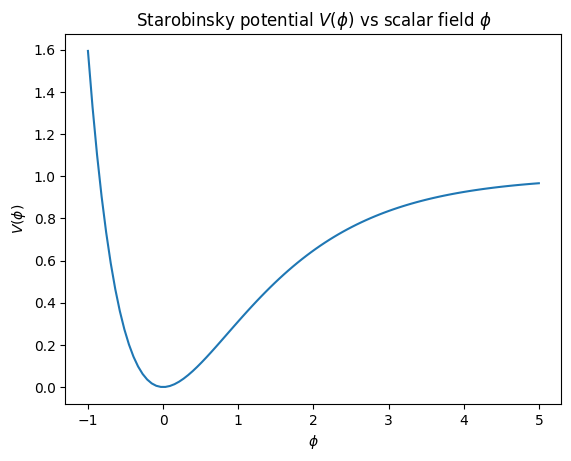

In [2]:
#Starobinsky potential model
phi = np.linspace(-1,5,100)
V_0= 1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 
plt.plot(phi,V) 
plt.xlabel(rf"$\phi$")
plt.ylabel(rf"$V(\phi)$")
plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')

The system of equations used are: 
$$
\dot{H}=-H^2+\frac{\ddot{a}}{a}~~~~ Raychaudhuri~Equation \\
\dot{\rho} +3H\rho =0~~~~ Continuity~Equation \\
\ddot{\phi} +3H\dot{\phi} +V_{,\phi}~~~~Klien-Gordon~~Equation
$$

which will be transformed using dimensionless variables:
$$
x=\frac{\dot{\phi}}{\sqrt{6}H} ~~the~kinetic~term\\
y=\frac{\sqrt{V}}{\sqrt{3}H}~~~potential~ term\\
z=\frac{\sqrt{\rho_b}}{\sqrt{3}H}~~barotropic~fluid~density~ term\\
\lambda = -\frac{V_{,\phi}}{V} ~~dimensionless~gradient~slope~of~the~potential
$$
Therefore the dynamical system becomes dimnesionless and plotable in phase space. The dimensionless equations are now given as:
$$
x' =
-3x
+ \sqrt{\frac{3}{2}} \lambda y^2
+ \frac{3}{2} x
\left[
2x^2 + (1+w_b) z^2
\right]\\

y' =
-\sqrt{\frac{3}{2}} \lambda x y
+ \frac{3}{2} y
\left[
2x^2 + (1+w_b) z^2
\right]\\

z' =
-\frac{3}{2} (1+w_b) z
+ \frac{3}{2} z
\left[
2x^2 + (1+w_b) z^2
\right]\\
\lambda' =
- \sqrt{6}\, x\, \lambda^{2} \left( \Gamma(\lambda) - 1 \right)\\

\Gamma = \frac{VV''}{(V')^2} = 1-\frac{1}{2}\left[\frac{(\lambda +2\sqrt{\frac{2}{3}})}{\lambda}\right]\\

\lambda = -\frac{V'}{V} = \frac{2\sqrt{\frac{2}{3}}}{1-\exp({\sqrt{\frac{2}{3}}\phi})}


$$

<>:38: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_3383/3252879634.py:38: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(N, w_phi, label='$\omega_\phi$')
/usr/local/python/3.12.1/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:623: UserWarning: The following arguments have no effect for a chosen solver: `N_span`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


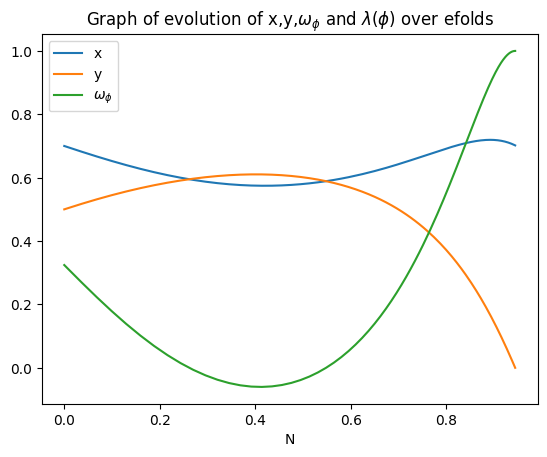

In [3]:
wb = 0

def Gamma(lam):
    return 1.0 - 0.5*((lam + (2/3)**0.5)/lam)**1.0
                                             
def system(N,X):
    x, y, z ,lam = X
    dx = -3*x+ np.sqrt(3/2)*lam*y**2 +1.5*x*(2* x**2+(1+wb)*z**2)  #shows how the kinetic energy density fraction grows over e folds
    dy = -np.sqrt(3/2)*x*y*lam+ 1.5*y*(2*x**2+(1+wb)*z**2)  #shows how the potential energy density fraction grows over e folds
    dz= -3/2 *(1+wb)*z+3/2*z*(2*x**2 +(1+wb)*z**2)
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy,dz, dlam]

# Initial conditions
X0 = [0.7, 0.5,0.5, 1]  #[0.7, 0.5,0.5, 0.1]   0.01, 0.9,0.43, 0.01
N_span = np.linspace(0, 100, 1000)# inflation lasted approx 60 efolds
#   early time inflation slow roll [0.01, 0.99, 0.01-1], wb=0, N=0-5
#   early time post inflation radiation dom time [0.05, 0.95, 1-3], wb=1/3, N=0-5
#   late time tracking [0.1, 0.1, 1-5], wb=0, N=0-60 or 100
#   late time tracking and scaling and DE [0.01, 0.01, 0.5] lambda dominated universe, wb = -1, N=0-60 or 100

sol = solve_ivp(system, [0, 100], X0, N_span = np.linspace(0, 100, 1000), rtol=1e-9, atol=1e-12)
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
lam = sol.y[3]
N = sol.t

x = np.clip(x, -1, 1)
y = np.clip(y, 0, 1)
z = np.clip(z, -1, 1)
w_phi = (x**2 - y**2)/(x**2 + y**2 + 1e-18)
w_phi = np.clip(w_phi, -1, 1)

plt.plot(N,x, label='x')
plt.plot(N, y, label='y')
#plt.plot(N_span, lam, label='$\lambda$')
plt.plot(N, w_phi, label='$\omega_\phi$')
plt.title(rf"Graph of evolution of x,y,$\omega_\phi$ and $\lambda(\phi)$ over efolds")
plt.legend()
plt.xlabel("N")
plt.show()


Gradient at points in the phi vs V plot

In [4]:
phi = np.linspace(-1,5,100)
V_0= 1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 

def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices =[]

#print(lam_slices)
for phi, V,m in zip(phi_pts, V_pts,grads):
    print(rf"at ({phi, V}) m={m}")
    print(rf"lambda={-m/V}")
    lam_slices.append(-m/V)
    print()
    #plt.scatter(phi,V)
print(lam_slices)

at ((np.float64(-1.0), np.float64(1.5940558416688972))) m=-4.354405162840924
lambda=2.7316515827212666

at ((np.float64(-0.030303030303030276), np.float64(0.0006275501966698984))) m=-0.04405202756275957
lambda=70.1968189899742

at ((np.float64(1.0), np.float64(0.3113892475111972))) m=0.4025242006863867
lambda=-1.2926721262972076

at ((np.float64(1.9696969696969697), np.float64(0.6396199680930459))) m=0.26153809659521343
lambda=-0.4088960783619053

at ((np.float64(3.0), np.float64(0.8347789269746457))) m=0.1288537898079989
lambda=-0.1543567831485431

at ((np.float64(3.9696969696969697), np.float64(0.9232995885235719))) m=0.06139837570960527
lambda=-0.0664988661023732

at ((np.float64(5.0), np.float64(0.9665533701746055))) m=0.02774586293785294
lambda=-0.02870598126706725

[np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.028705981

Dynamical system solver using odeint, assuming $\kappa$ =0 or flat curvature

<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:126: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:126: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3383/3357982366.py:49: SyntaxWarning: invalid escape sequence '\o'
  """
/tmp/ipykernel_3383/3357982366.py:126: SyntaxWarning: invalid escape sequence '\p'
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")


[np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.02870598126706725)]
Plot of phase portrait xy at $\lambda$=2.7317
Physical fixed points: [[-1.0, 0.0], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         6.34557627]
Type=node
Stability=Repeller

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [ 6.         -0.34557627]
Type=node
Stability=saddle



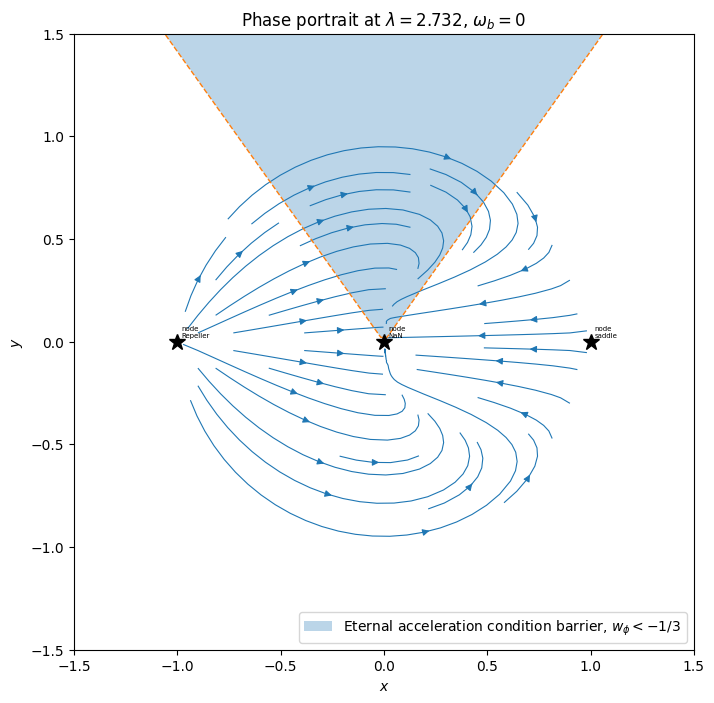

Plot of phase portrait xy at $\lambda$=70.1968
Physical fixed points: [[-1.0, 0.0], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [ 6.         88.97319405]
Type=node
Stability=Repeller

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [  6.         -82.97319405]
Type=node
Stability=saddle



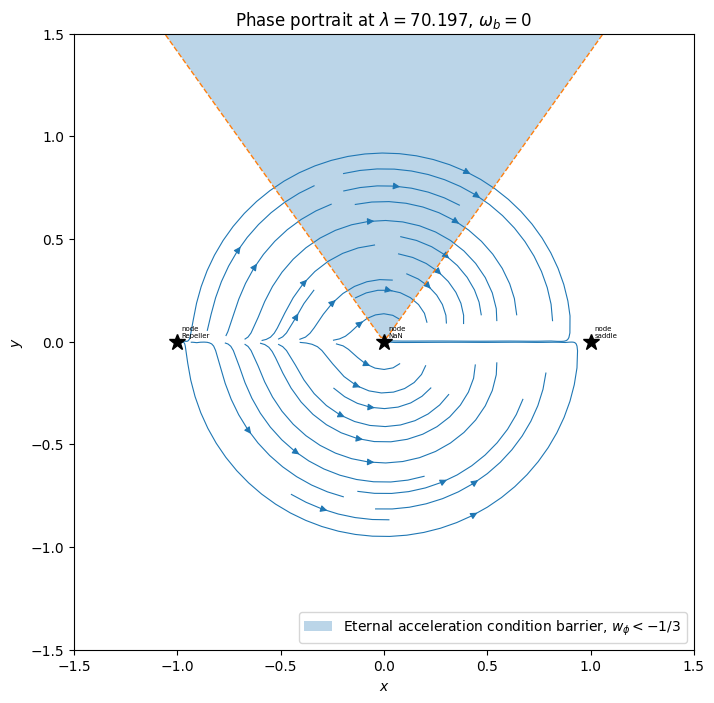

Plot of phase portrait xy at $\lambda$=-1.2927
Physical fixed points: [[-1.0, 0.0], [-0.5277311856911233, -0.8494114407335477], [-0.5277311856911233, 0.8494114407335477], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         1.41680644]
Type=node
Stability=Repeller

Fixed points (-0.5277311856911233,-0.8494114407335477)
Eigen Values: [-2.16449939  1.67100123]
Type=node
Stability=saddle

Fixed points (-0.5277311856911233,0.8494114407335477)
Eigen Values: [-2.16449939  1.67100123]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         4.58319356]
Type=node
Stability=Repeller



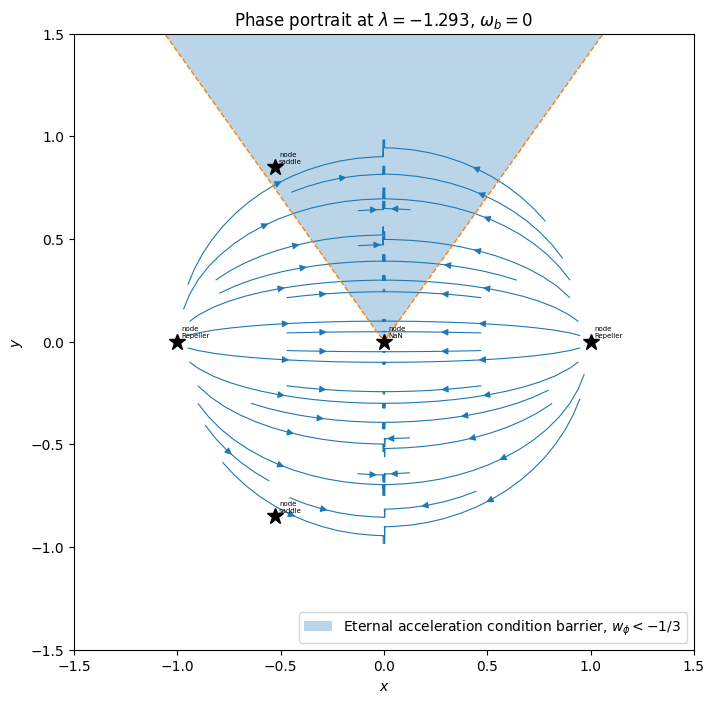

Plot of phase portrait xy at $\lambda$=-0.4089
Physical fixed points: [[-1.0, 0.0], [-0.16693112496862567, -0.9859685590913684], [-0.16693112496862567, 0.9859685590913684], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.49920663]
Type=node
Stability=Repeller

Fixed points (-0.16693112496862567,-0.9859685590913684)
Eigen Values: [-2.916402  0.167196]
Type=node
Stability=saddle

Fixed points (-0.16693112496862567,0.9859685590913684)
Eigen Values: [-2.916402  0.167196]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.50079337]
Type=node
Stability=Repeller



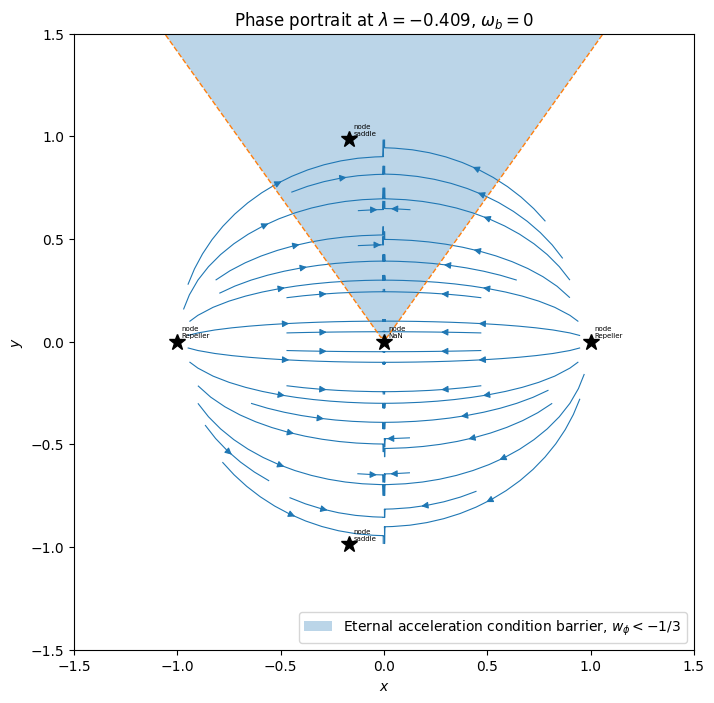

Plot of phase portrait xy at $\lambda$=-0.1544
Physical fixed points: [[-1.0, 0.0], [-0.063015892841894, -0.9980125235934362], [-0.063015892841894, 0.9980125235934362], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.81095232]
Type=node
Stability=Repeller

Fixed points (-0.063015892841894,-0.9980125235934362)
Eigen Values: [-2.98808699  0.02382602]
Type=node
Stability=saddle

Fixed points (-0.063015892841894,0.9980125235934362)
Eigen Values: [-2.98808699  0.02382602]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.18904768]
Type=node
Stability=Repeller



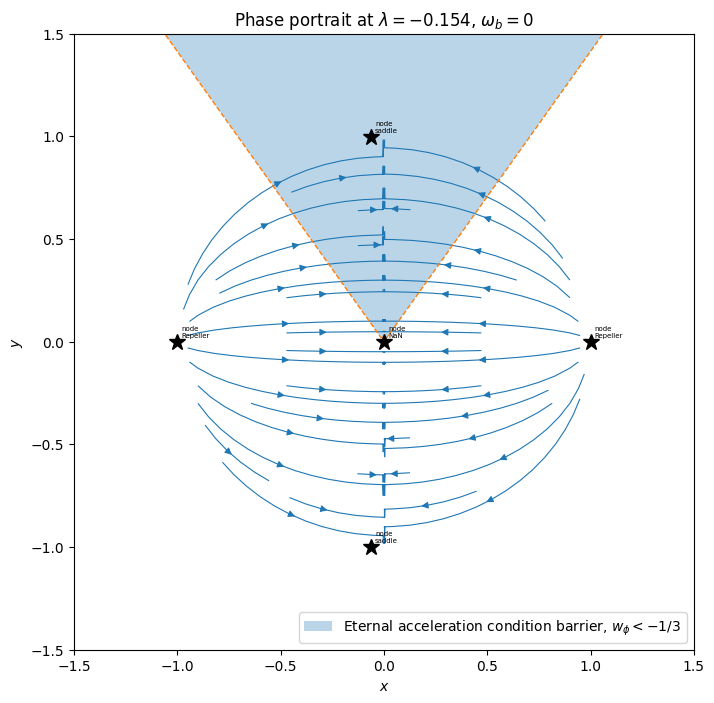

Plot of phase portrait xy at $\lambda$=-0.0665
Physical fixed points: [[-1.0, 0.0], [-0.0271480484040792, -0.9996314238097208], [-0.0271480484040792, 0.9996314238097208], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.91855585]
Type=node
Stability=Repeller

Fixed points (-0.0271480484040792,-0.9996314238097208)
Eigen Values: [-2.99778895  0.0044221 ]
Type=node
Stability=saddle

Fixed points (-0.0271480484040792,0.9996314238097208)
Eigen Values: [-2.99778895  0.0044221 ]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.08144415]
Type=node
Stability=Repeller



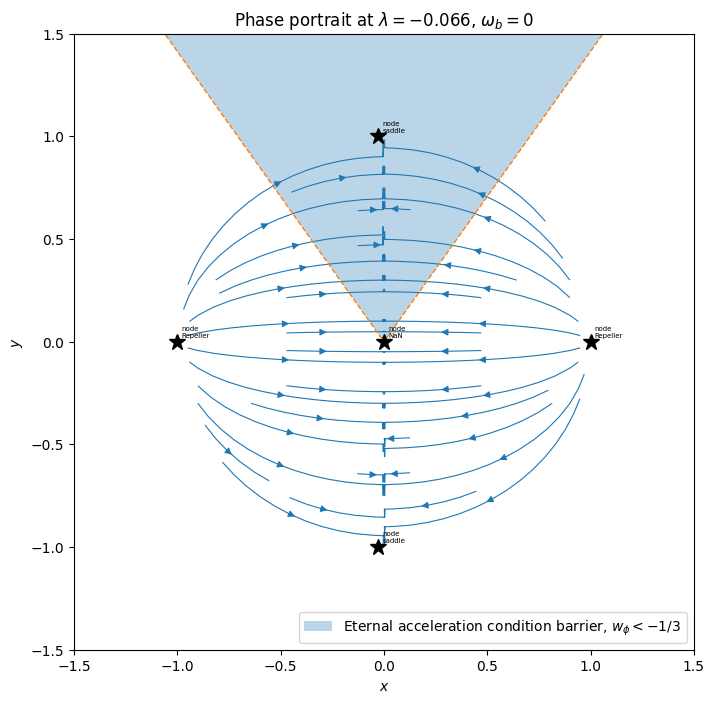

Plot of phase portrait xy at $\lambda$=-0.0287
Physical fixed points: [[-1.0, 0.0], [-0.011719167778367868, -0.9999313281953829], [-0.011719167778367868, 0.9999313281953829], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.        2.9648425]
Type=node
Stability=Repeller

Fixed points (-0.011719167778367868,-0.9999313281953829)
Eigen Values: [-2.99958798e+00  8.24033361e-04]
Type=node
Stability=saddle

Fixed points (-0.011719167778367868,0.9999313281953829)
Eigen Values: [-2.99958798e+00  8.24033361e-04]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.        3.0351575]
Type=node
Stability=Repeller



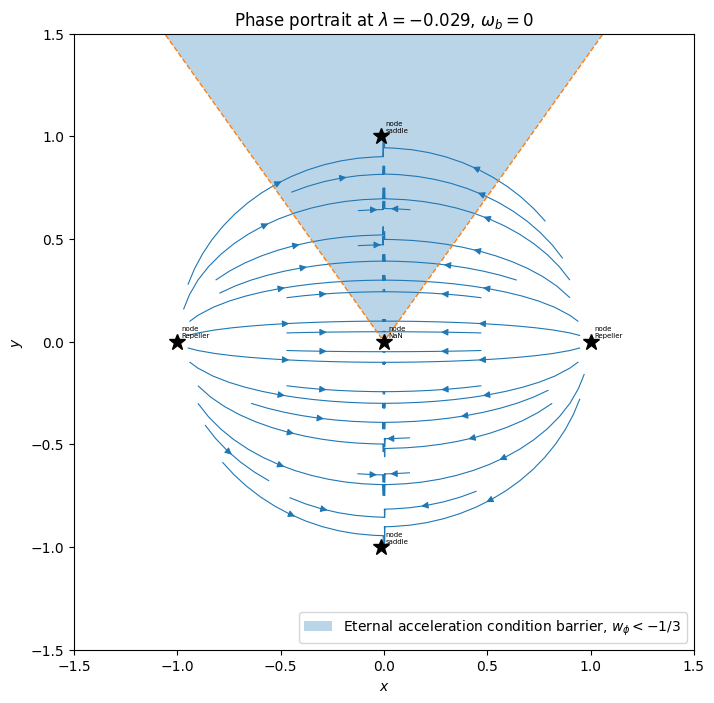

In [8]:
wb = 0 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
z0=0
phi = np.linspace(-1,5,100)
V0=1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 
def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices =[]

for phi, V,m in zip(phi_pts, V_pts,grads):
    lam_val=-m/V
    lam_slices.append(lam_val)
print(lam_slices)


def Gamma(lam):
    lam = max(lam, 1e-6)
    return 1-0.5*((lam+2*np.sqrt(2/3))/lam)  

def dynamicsStateSpace(x,y,z,lam):
    
    lam = max(lam, 1e-6)# avoids runaway lambda when kinetic energy domination goes to -
    dx = -3*x+ np.sqrt(3/2)*lam*y**2 +1.5*x*(2*x**2 +(1+wb)*z**2)  #shows how the kinetic energy density fraction grows over e folds
    dy = -np.sqrt(3/2)*x*y*lam+ 1.5*y*(2*x**2 +(1+wb)*z**2)  #shows how the potential energy density fraction grows over e folds
    dz= -3/2 *(1+wb)*z+3/2*z*(2*x**2 +(1+wb)*z**2)
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy,dz, dlam]

def dynamics_odeint(X,N,lam_fixed):
  x,y,z,_ = X
  dx,dy,dz,dlam = dynamicsStateSpace(x,y,z,lam_fixed)
  return [dx,dy,dz,dlam]

# plot the dynamics on the same graph
initialState=np.array([0.7, 0.5,z0, 0.5])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position

simulationTime=np.linspace(0,50,600)#  number of e folds of time, inflation lasted 50-60
# generate the state-space trajectory

"""
x_vals = solutionState[:,0]
y_vals = solutionState[:,1]
z_vals = solutionState[:,2]
lam_vals = solutionState[:,3]
w_phi = ((solutionState[:,0])**2-(solutionState[:,1])**2)/((solutionState[:,0])**2+(solutionState[:,1])**2)

plt.plot(simulationTime,w_phi)
plt.ylabel(rf'$\omega_\phi$')
plt.xlabel('Simulation time e folds')
plt.show()

plt.plot(simulationTime,lam_vals)
plt.ylabel('lam_vals')
plt.xlabel('Simulation time e folds')
plt.show()
"""
#plotting phase portrait at lambda slice
def phase_plot_at_lam(lam_slice,initialState):
  solutionState=odeint(dynamics_odeint,initialState,simulationTime,args=(lam_slice,),rtol=1e-10,atol=1e-10,mxstep=500)
  #lam_slice = lam_vals[lam_index]
  print(rf"Plot of phase portrait xy at $\lambda$={lam_slice:.4f}")
  x_vals = solutionState[:,0]
  y_vals = solutionState[:,1]

  # defining a grid of points at which we create/compute tangent arrows
  x0 = np.linspace(-1.5,1.5,100)
  x1 = np.linspace(-1.5,1.5,100)
  X0,X1 = np.meshgrid(x0,x1)
  dX0 = np.zeros(X0.shape)
  dX1 = np.zeros(X1.shape)

  for i in range(X0.shape[0]):
      for j in range(X0.shape[1]):
          if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
              dx,dy,_,_= dynamicsStateSpace(X0[i,j], X1[i,j],z0, lam_slice)
              dX0[i,j] = dx
              dX1[i,j] = dy
          else:
              dX0[i,j] = np.nan
              dX1[i,j] = np.nan

  x_FP, y_FP,z_FP,lam_FP = sp.symbols('x y z lam', real=True)

  Gamma_sym = 1 - 0.5*((lam_FP + 2*sp.sqrt(2/3))/lam_FP)
  f = -3*x_FP+ np.sqrt(3/2)*lam_FP*y_FP**2 +1.5*x_FP*(2* x_FP**2+(1+wb)*z_FP**2)  #shows how the kinetic energy density fraction grows over e folds
  g = -np.sqrt(3/2)*x_FP*y_FP*lam_FP+ 1.5*y_FP*(2*x_FP**2+(1+wb)*z_FP**2)  #shows how the potential energy density fraction grows over e folds
  #h= -3/2 *(1+wb)*z_FP+3/2*z_FP*(2*x_FP**2 +(1+wb)*z_FP**2)
  #e = -np.sqrt(6)*x_FP*lam_FP**2*(Gamma_sym-1)
  J_sym = sp.Matrix([f, g]).jacobian([x_FP, y_FP]) # Symbolic Jacobian for x and y 2D

  f_lam = f.subs({lam_FP: lam_slice, z_FP: z0})
  g_lam = g.subs({lam_FP: lam_slice, z_FP: z0})
  
  solutions = sp.solve([f_lam, g_lam], [x_FP, y_FP], dict=True)
  FP=[]
  for sol in solutions:
    if x_FP in sol and y_FP in sol:
      x_val = sol[x_FP]
      y_val = sol[y_FP]
      #z_val = sol[z_FP]
      #lam_val = sol[lam_FP]
      if x_val.is_real and y_val.is_real:
          x_val,y_val = float(x_val),float(y_val)
          if x_val**2 +y_val**2<=1.5:
            FP.append([float(x_val),float(y_val)])
  print("Physical fixed points:", FP)

  plt.figure(figsize=(8,8))
  plt.streamplot(X0, X1, dX0, dX1, density=1.2, linewidth=0.8)
  #plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
  #plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')

# eternal acc is w_phi<-1/3 leads to y=+-root(2) x
  xs = np.linspace(-1.5, 1.5,100)
  ys = np.sqrt(2)*np.abs(xs)
  plt.plot(xs,ys,'--',lw=1)
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")


  def classify_FP(eigvals,temp=1e-10):
    Real = np.real(eigvals)
    Imag = np.imag(eigvals)
    if np.all(Real<-temp):
      stability = 'Attractor'
    elif np.all(Real>temp):
      stability = 'Repeller'
    elif np.any(Real<-temp) and np.any(Real > temp):
      stability = 'saddle'
    elif np.all(np.abs(Real) < temp):
      stability = 'Centre'
    else:
      stability = 'NaN'
    if np.any(np.abs(Imag)>temp):
      point_type = 'Spiral'
    else:
      point_type = 'node'

    return stability,point_type

  for fp in FP:
    x_c, y_c = fp
    J_num = np.array(J_sym.subs({x_FP: x_c,y_FP: y_c,lam_FP: lam_slice,z_FP: z0}),dtype=float)
    eigvals = np.linalg.eigvals(J_num)
    stability,point_type = classify_FP(eigvals)
    print(f'Fixed points ({x_c:},{y_c})')
    print('Eigen Values:',eigvals)
    print(f'Type={point_type}')
    print(f'Stability={stability}\n')
    plt.plot(x_c, y_c, 'k*', markersize=12)
    plt.text(x_c+0.02, y_c+0.02, f"{point_type}\n{stability}", fontsize=5)
    
    
  plt.xlabel(r"$x$")
  plt.ylabel(r"$y$")
  plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}$, $\omega_b={wb}$")
  plt.xlim(-1.5,1.5)
  plt.ylim(-1.5,1.5)
  plt.legend()
  plt.show()





slice_no = 6
for lam_slice in lam_slices:
    phase_plot_at_lam(lam_slice, initialState)


# https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/, https://www.youtube.com/watch?v=DeeoiE22bZ8, method from https://iopscience.iop.org/article/10.1088/1475-7516/2018/01/018/meta


Lambda slices: [np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.02870598126706725)]
Phase portrait xy at lambda=2.7317


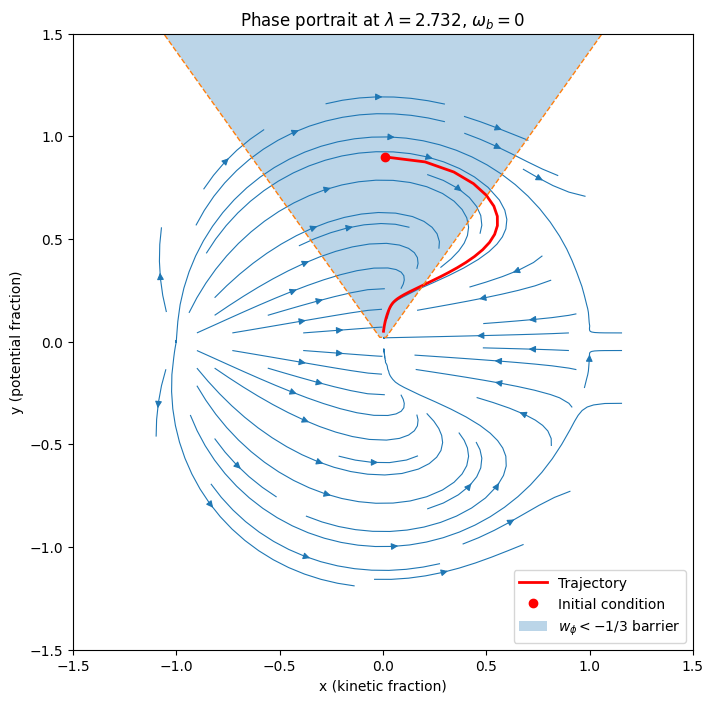

Phase portrait xy at lambda=70.1968


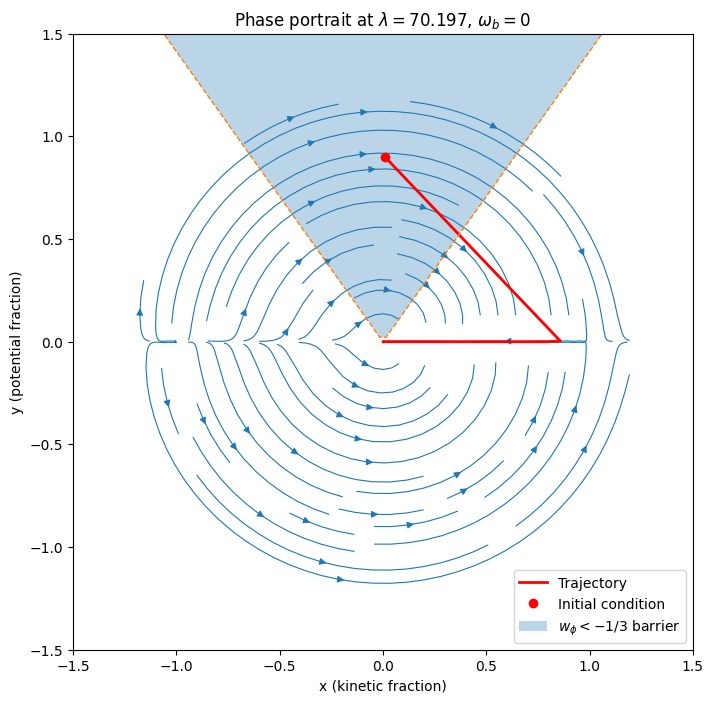

Phase portrait xy at lambda=-1.2927


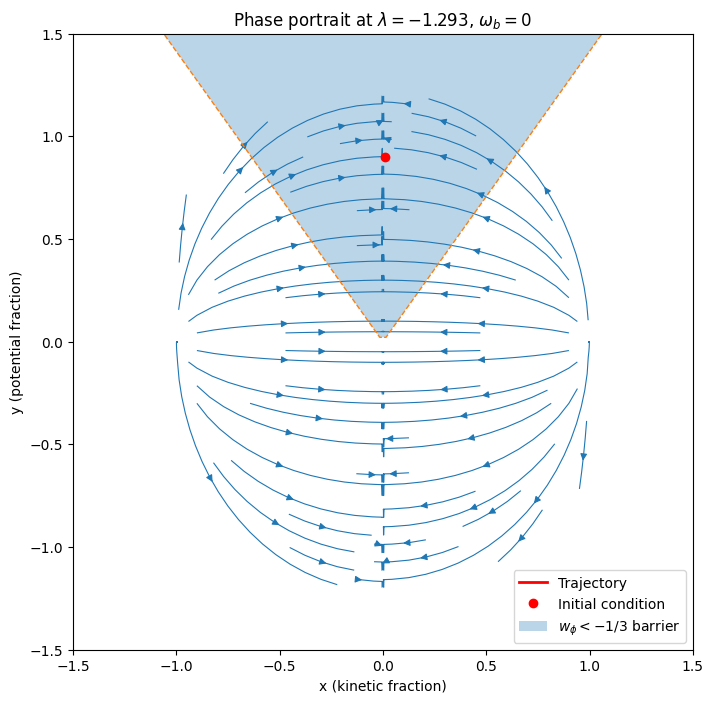

Phase portrait xy at lambda=-0.4089


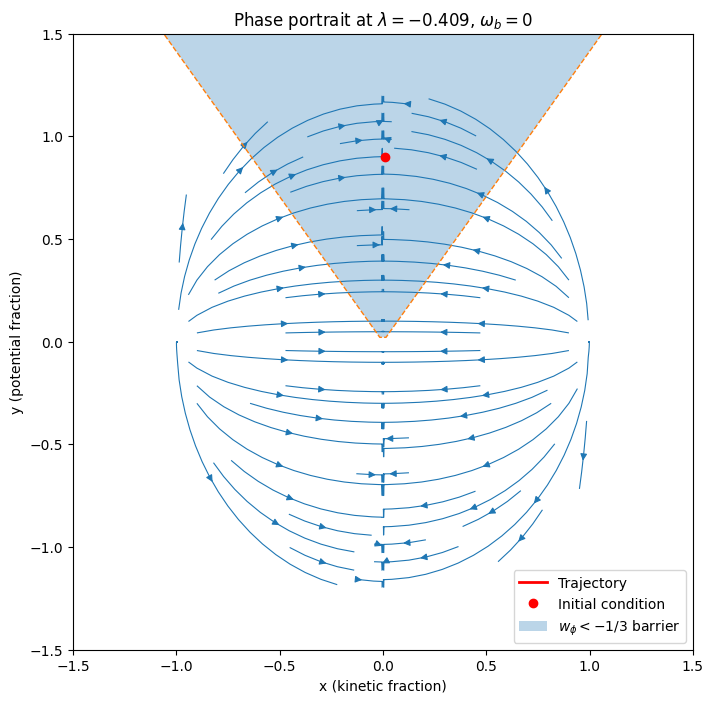

Phase portrait xy at lambda=-0.1544


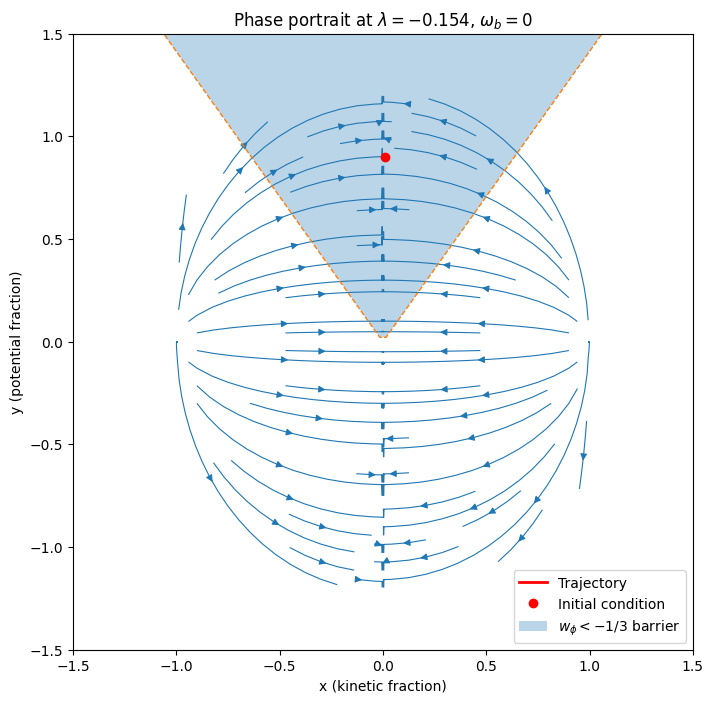

Phase portrait xy at lambda=-0.0665


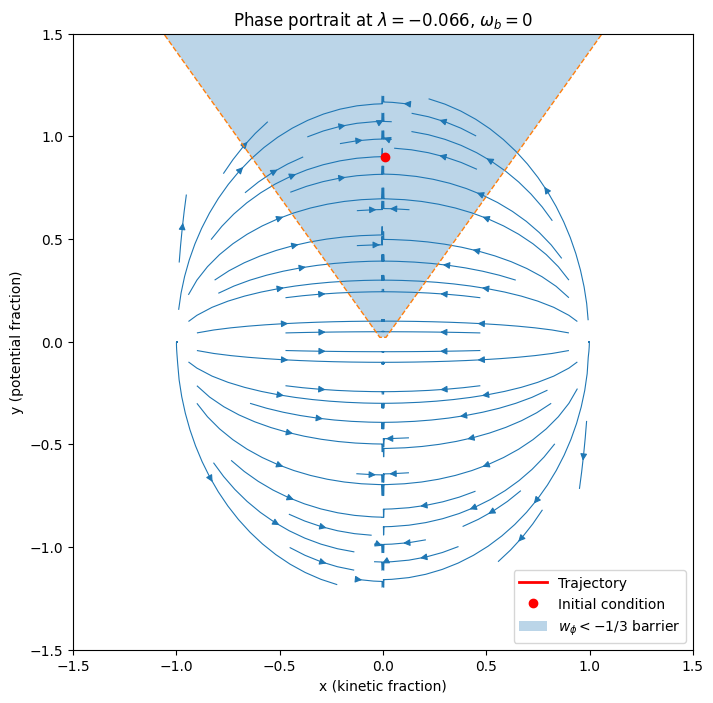

Phase portrait xy at lambda=-0.0287


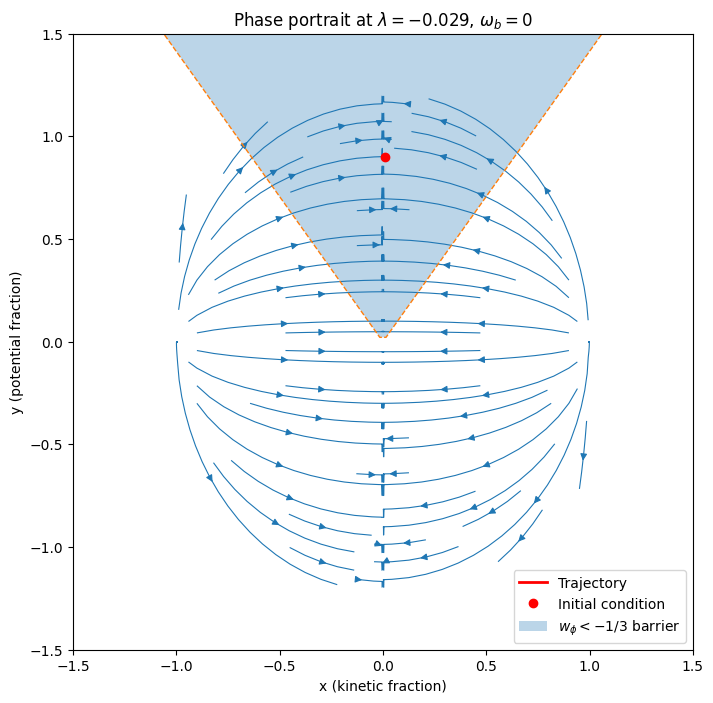

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp

# -----------------------------
# 1️⃣ Define potential and lambda slices
# -----------------------------
phi = np.linspace(-1,5,100)
V_0= 1
V = V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 

def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices = []

for phi_val, V_val, m in zip(phi_pts, V_pts, grads):
    lam_val = -m / V_val
    lam_slices.append(lam_val)
print("Lambda slices:", lam_slices)

# -----------------------------
# 2️⃣ Define dynamics functions
# -----------------------------
wb = 0  # scalar dominated era
z0 = 0  # freeze z to simplify 2D plot

def Gamma(lam):
    lam = max(lam, 1e-6)
    return 1 - 0.5*((lam + 2*np.sqrt(2/3))/lam)

def dynamicsStateSpace(x, y, z, lam):
    lam = max(lam, 1e-6)
    dx = -3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*(2*x**2 + (1+wb)*z**2)
    dy = -np.sqrt(3/2)*x*y*lam + 1.5*y*(2*x**2 + (1+wb)*z**2)
    dz = -3/2*(1+wb)*z + 3/2*z*(2*x**2 + (1+wb)*z**2)
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)
    return [dx, dy, dz, dlam]

def dynamics_odeint(X, N, lam_fixed):
    x, y, z, _ = X
    dx, dy, dz, dlam = dynamicsStateSpace(x, y, z, lam_fixed)
    return [dx, dy, dz, dlam]

# -----------------------------
# 3️⃣ Phase portrait function at fixed lambda slice
# -----------------------------
def phase_plot_at_lam(lam_slice, initialState):
    print(rf"Phase portrait xy at lambda={lam_slice:.4f}")
    simulationTime = np.linspace(0, 50, 600)
    solutionState = odeint(dynamics_odeint, initialState, simulationTime, args=(lam_slice,))
    x_vals, y_vals = solutionState[:,0], solutionState[:,1]

    # Vector field for streamplot
    x0 = np.linspace(-1.5, 1.5, 100)
    y0 = np.linspace(-1.5, 1.5, 100)
    X0, Y0 = np.meshgrid(x0, y0)
    dX0 = np.zeros(X0.shape)
    dY0 = np.zeros(Y0.shape)
    for i in range(X0.shape[0]):
        for j in range(X0.shape[1]):
            if X0[i,j]**2 + Y0[i,j]**2 <= 1.5:
                dx, dy, _, _ = dynamicsStateSpace(X0[i,j], Y0[i,j], z0, lam_slice)
                dX0[i,j] = dx
                dY0[i,j] = dy
            else:
                dX0[i,j] = np.nan
                dY0[i,j] = np.nan

    plt.figure(figsize=(8,8))
    plt.streamplot(X0, Y0, dX0, dY0, density=1.2, linewidth=0.8)
    plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
    plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')

    # Eternal acceleration barrier: y = sqrt(2)|x|
    xs = np.linspace(-1.5, 1.5, 100)
    ys = np.sqrt(2)*np.abs(xs)
    plt.plot(xs, ys, '--', lw=1)
    plt.fill_between(xs, ys, 1.5, alpha=0.3, label=r"$w_\phi < -1/3$ barrier")

    plt.xlabel("x (kinetic fraction)")
    plt.ylabel("y (potential fraction)")
    plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}$, $\omega_b={wb}$")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

# -----------------------------
# 4️⃣ Loop over lambda slices
# -----------------------------
initialState = [0.01, 0.9, z0, 0.5]  # choose a physically reasonable starting point

for lam_slice in lam_slices:
    phase_plot_at_lam(lam_slice, initialState)
